In [154]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [155]:
import numpy as np
import pandas as pd

In [156]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [157]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [158]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [159]:
# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect = True)

In [160]:
# We can view all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [161]:
# Save references to each table
measurement =base.classes.measurement
station = base.classes.station

In [162]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [163]:
from sqlalchemy import inspect
inspect = inspect(engine)


In [164]:
inspect.get_table_names()


['measurement', 'station']

In [165]:
columns = inspect.get_columns('Measurement')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [166]:
columns = inspect.get_columns('station')
for column in columns:
    print(column['name'], column['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

In [167]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
last_12 = session.query(measurement.date).order_by(measurement.date.desc()).first()
last_12_m=last_12[0]
last_12_m




'2017-08-23'

In [168]:
# Calculate the date 1 year ago from the last data point in the database

last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(last_year)


2016-08-23


In [169]:
# Perform a query to retrieve the data and precipitation scores

query_data= session.query(measurement.date, measurement.prcp).\
            filter(measurement.date >= last_year).\
            order_by(measurement.date).all()

query_data

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [170]:
# Save the query results as a Pandas DataFrame and set the index to the date column
query_data_df= pd.DataFrame(query_data, columns=['Date','Precipitation'])
query_data_df= query_data_df.set_index('Date')
query_data_df.head()






,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


In [171]:

# Sort the dataframe by date
sort_df= query_data_df.sort_values(by= 'Date', ascending =True)
sort_df.head()


,Precipitation
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


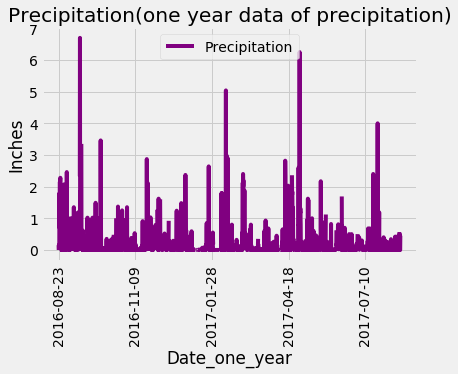

In [194]:
# Use Pandas Plotting with Matplotlib to plot the data
sort_df.plot(title="Precipitation(one year data of precipitation)",color='purple', rot = 90)
plt.legend(loc="upper center")
plt.ylabel("Inches")
plt.xlabel('Date_one_year')
plt.savefig("Images/Precipitation.png")

In [173]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sort_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [174]:
# Design a query to show how many stations are available in this dataset?
session.query(measurement.station).distinct().count()

9

In [175]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

active_station = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
active_station


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [176]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
station_id= active_station[0][0]
recorded_tobs= session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
recorded_tobs

[(54.0, 85.0, 71.66378066378067)]

In [177]:
# Choose the station with the highest number of temperature observations.

station_tobs = session.query(measurement.station,func.count(measurement.tobs)).group_by(measurement.station).order_by(func.count(measurement.tobs).desc()).first()
station_tobs = station_tobs [0]
station_tobs


'USC00519281'

In [185]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

query_data_tobs= session.query(measurement.tobs).filter(measurement.date >= last_year).filter(measurement.station == station_tobs).all()
# query_data_tobs
tobs_observe_df = pd.DataFrame(query_data_tobs, columns=["temperature"])
tobs_observe_df.head()

,temperature
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


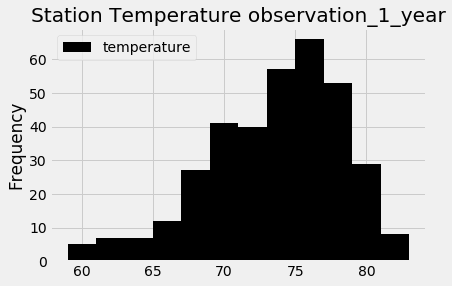

In [190]:
# Plot the results as a histogram
tobs_observe_df.plot.hist(bins=12, title='Station Temperature observation_1_year', color='black')
plt.savefig('Images/temperature.png')

## Bonus Challenge Assignment

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
